# Visualizing 3D Vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from mpl_toolkits.mplot3d import Axes3D

def draw_vector(x,y,z):
    
    origin_3d = [0,0,0] # origin point
    
    soa = np.array([[origin_3d[0], origin_3d[1], origin_3d[2], x[0], x[1], x[2]], [origin_3d[0], origin_3d[1], origin_3d[2], y[0], y[1], y[2]], [origin_3d[0], origin_3d[1], origin_3d[2], z[0], z[1], z[2]]])

    X, Y, Z, U, V, W = zip(*soa)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Color by azim
    c = np.arctan2(V, U)
    # Flatten and normalize
    c = (c.ravel() - c.min()) / c.ptp()
    # Repeat for each body line and two head lines
    c = np.concatenate((c, np.repeat(c, 2)))
    # Colormap
    c = plt.cm.hsv(c)
    
    ax.quiver(X, Y, Z, U, V, W, colors=c, arrow_length_ratio=0.1, lw=2)
    
    # set the x, y and z axis limits
    xlow = min(origin_3d[0],x[0],y[0],z[0])-1
    xhigh = max(origin_3d[0],x[0],y[0],z[0])+1
    ylow = min(origin_3d[1],x[1],y[1],z[1])-1
    yhigh = max(origin_3d[1],x[1],y[1],z[1])+1
    zlow = min(origin_3d[2],x[2],y[2],z[2])-1
    zhigh = max(origin_3d[2],x[2],y[2],z[2])+1
    ax.set_xlim([xlow, xhigh])
    ax.set_ylim([ylow, yhigh])
    ax.set_zlim([zlow, zhigh])
    
    # draw axes
    ax.plot([xlow,xhigh],[0,0],[0,0],'k--')
    ax.plot([0,0],[ylow,yhigh],[0,0],'k--')
    ax.plot([0,0],[0,0],[zlow,zhigh],'k--')
    
    # Draw axis labels
    ax.text(xhigh,0,0,'+X')
    ax.text(0,yhigh,0,'+Y')
    ax.text(0,0,zhigh,'+Z')
    
    # Set azimuth and elevation
    ax.view_init(azim=30, elev=30)
    
    plt.draw()
    plt.show()

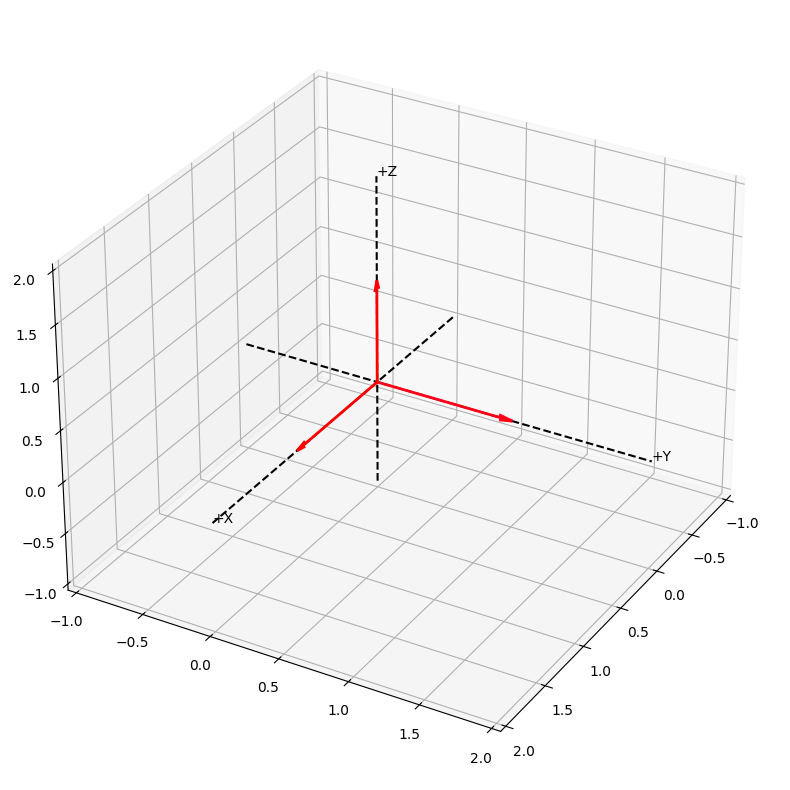

In [36]:
draw_vector([1,0,0],[0,1,0],[0,0,1])

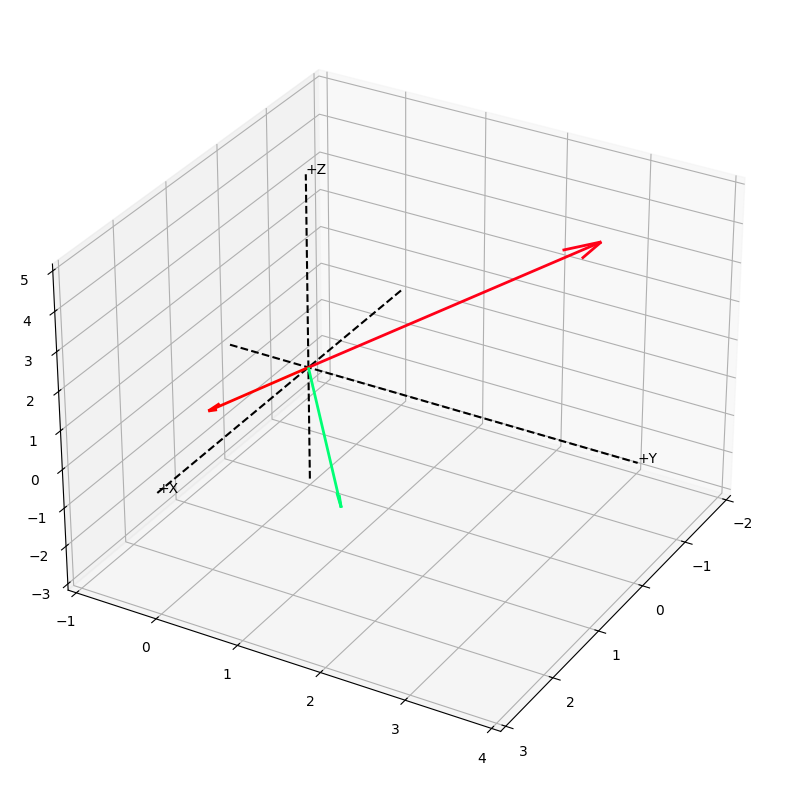

In [37]:
draw_vector([2,0,1],[-1,3,4],[1,1,-2])

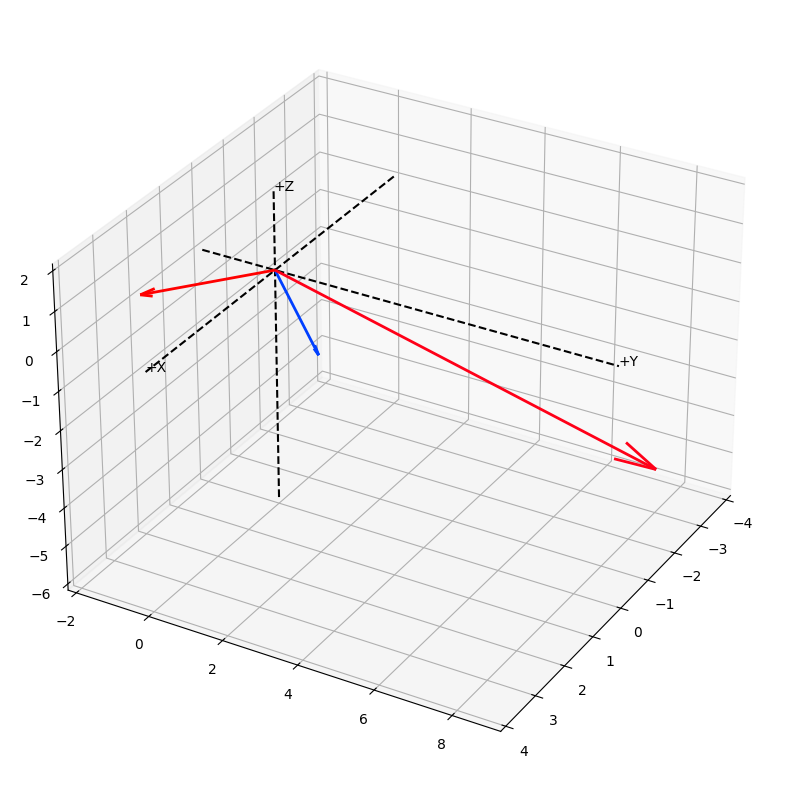

In [38]:
draw_vector([1,2,-1],[3,-1,1],[-3,8,-5])